In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("jp_jartic_processed_20230101_to_20231231.csv", parse_dates=['timestamp'])


In [12]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8677621 entries, 0 to 8677620
Data columns (total 13 columns):
 #   Column              Dtype              
---  ------              -----              
 0   timestamp           datetime64[ns, UTC]
 1   h3_index_res8       object             
 2   avg_traffic_volume  float64            
 3   max_traffic_volume  int64              
 4   traffic_volume_std  float64            
 5   measurement_count   int64              
 6   avg_distance        float64            
 7   unique_links        int64              
 8   h3_lat_res8         float64            
 9   h3_lon_res8         float64            
 10  prefecture          object             
 11  data_source         object             
 12  country             object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(3), object(4)
memory usage: 860.7+ MB


,avg_traffic_volume,max_traffic_volume,traffic_volume_std,measurement_count,avg_distance,unique_links,h3_lat_res8,h3_lon_res8
count,8.677621e+06,8.677621e+06,8.119435e+06,8.677621e+06,8.677621e+06,8.677621e+06,8.677621e+06,8.677621e+06
mean,2.693803e+01,5.756698e+01,1.379109e+01,3.518982e+01,5.191792e+01,3.486862e+01,3.580111e+01,1.366581e+02
std,2.219352e+01,5.444943e+01,1.164406e+01,6.188027e+01,4.651530e+01,6.157868e+01,2.867557e+00,3.869053e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.612238e+01,1.276863e+02
25%,6.972222e+00,1.600000e+01,4.353410e+00,5.000000e+00,2.837097e+01,5.000000e+00,3.420964e+01,1.334354e+02
50%,2.300000e+01,4.400000e+01,1.086319e+01,1.300000e+01,4.081707e+01,1.300000e+01,3.537383e+01,1.371892e+02
75%,4.234000e+01,8.200000e+01,2.027763e+01,3.600000e+01,5.928000e+01,3.600000e+01,3.654506e+01,1.399405e+02
max,2.880000e+02,9.440000e+03,9.075989e+02,6.940000e+02,7.300000e+02,6.940000e+02,4.537708e+01,1.444370e+02


In [17]:
df.isna().sum()

timestamp                  0
h3_index_res8              0
avg_traffic_volume         0
max_traffic_volume         0
traffic_volume_std    558186
measurement_count          0
avg_distance               0
unique_links               0
h3_lat_res8                0
h3_lon_res8                0
prefecture                 0
data_source                0
country                    0
weekday                    0
dtype: int64

In [24]:
tokyo_df = df[df['prefecture'] == 'tokyo'].copy()
print(tokyo_df.shape)


(69423, 14)


In [28]:
tokyo_df_resampled = tokyo_df.set_index('timestamp').resample('h').mean(numeric_only=True).reset_index()


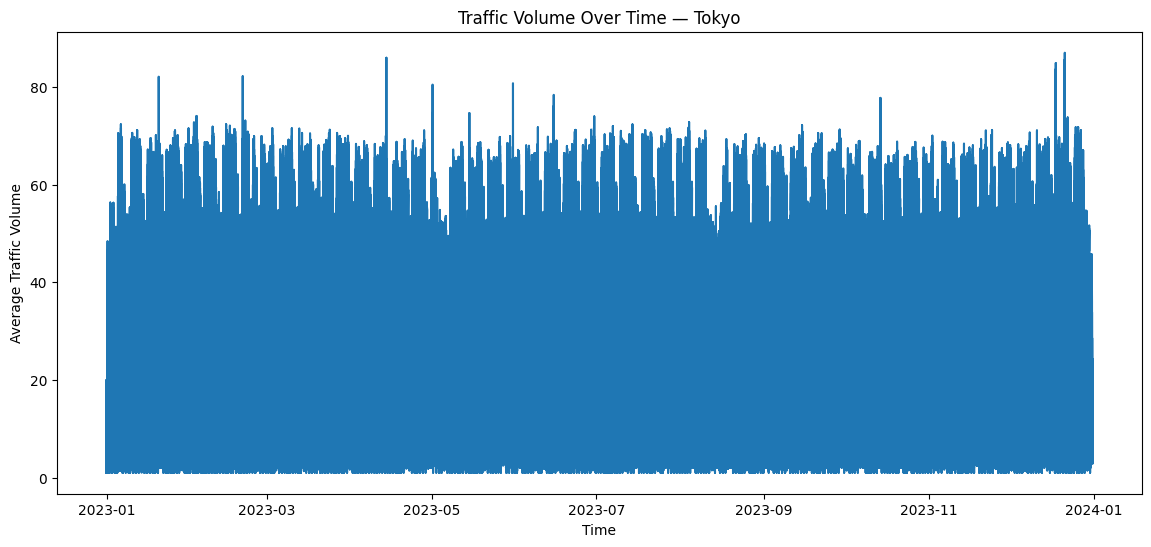

In [29]:
plt.figure(figsize=(14,6))
plt.plot(tokyo_df['timestamp'], tokyo_df['avg_traffic_volume'])
plt.title("Traffic Volume Over Time — Tokyo")
plt.xlabel("Time")
plt.ylabel("Average Traffic Volume")
plt.show()


In [32]:
tokyo_df['lag1'] = tokyo_df['avg_traffic_volume'].shift(1)
tokyo_df['lag24'] = tokyo_df['avg_traffic_volume'].shift(24)
tokyo_df = tokyo_df.dropna()
tokyo_df 

,timestamp,h3_index_res8,avg_traffic_volume,max_traffic_volume,traffic_volume_std,measurement_count,avg_distance,unique_links,h3_lat_res8,h3_lon_res8,prefecture,data_source,country,weekday,lag1,lag24
9006,2023-01-01 00:00:00+00:00,882f5b52d9fffff,25.981132,71,17.071671,53,46.075472,53,35.711911,139.311290,tokyo,jartic,JP,Sunday,25.713542,11.357143
9008,2023-01-01 00:00:00+00:00,882f5b5513fffff,9.958333,21,4.563362,24,92.625000,24,35.791446,139.184740,tokyo,jartic,JP,Sunday,25.981132,8.812500
9044,2023-01-01 00:00:00+00:00,882f5aaf31fffff,22.462121,69,14.602314,132,27.248062,130,35.622379,139.812136,tokyo,jartic,JP,Sunday,9.958333,3.842105
9061,2023-01-01 00:00:00+00:00,882f5b461bfffff,6.000000,8,2.828427,2,85.500000,2,35.791744,139.058782,tokyo,jartic,JP,Sunday,22.462121,18.396396
9310,2023-01-01 00:00:00+00:00,882f5bc9d1fffff,24.212598,81,15.903294,127,51.244094,127,35.711284,139.437518,tokyo,jartic,JP,Sunday,6.000000,8.256198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676688,2023-12-31 14:00:00+00:00,882f5b52d9fffff,12.065217,32,7.755721,46,45.956522,46,35.711911,139.311290,tokyo,jartic,JP,Sunday,11.462766,20.015203
8676690,2023-12-31 14:00:00+00:00,882f5b5513fffff,2.888889,6,1.367217,18,85.888889,18,35.791446,139.184740,tokyo,jartic,JP,Sunday,12.065217,19.307692
8676710,2023-12-31 14:00:00+00:00,882f5b461bfffff,3.500000,4,0.707107,2,85.500000,2,35.791744,139.058782,tokyo,jartic,JP,Sunday,2.888889,4.272727
8676727,2023-12-31 14:00:00+00:00,882f5aaf31fffff,18.666667,86,14.280851,129,25.726562,127,35.622379,139.812136,tokyo,jartic,JP,Sunday,3.500000,3.500000


**Train/test split**

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error


X = tokyo_df[['lag1', 'lag24']]
y = tokyo_df['avg_traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.2783987601352381
RMSE: 272.234318960949


**Plotting**

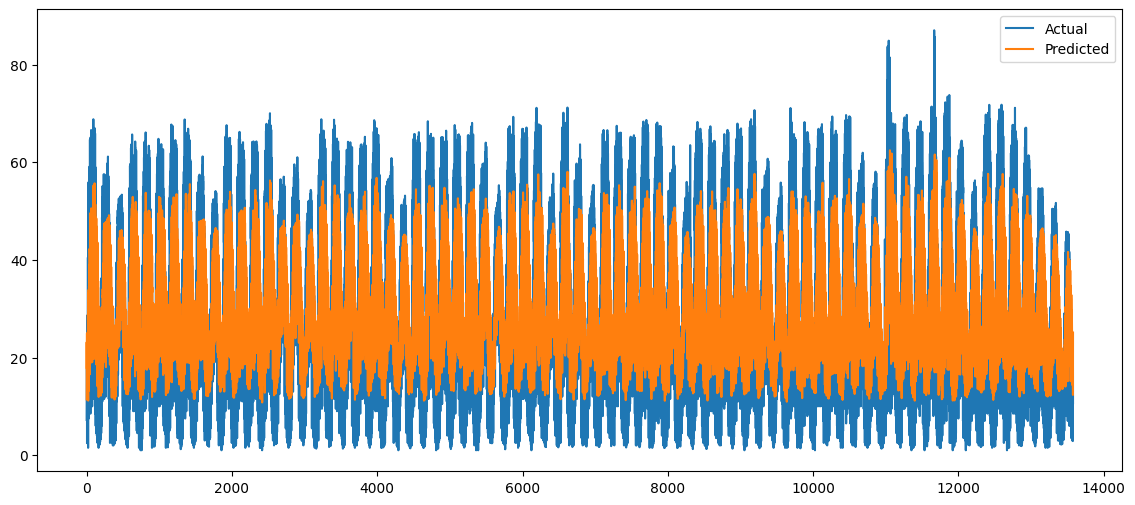

In [35]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


**Compares weekday vs weekend traffic**

In [45]:
tokyo_df['weekday_num'] = tokyo_df['weekday'].map({
    'Monday': 0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
    'Friday':4, 'Saturday':5, 'Sunday':6
})

tokyo_df['is_weekend'] = tokyo_df['weekday'].isin(['Saturday', 'Sunday'])

tokyo_df['hour'] = tokyo_df['timestamp'].dt.hour

agg = tokyo_df.groupby(['is_weekend', 'hour'])[['avg_traffic_volume', 'lag1', 'lag24']].mean().reset_index()
print(agg)


    is_weekend  hour  avg_traffic_volume       lag1      lag24
0        False     0           41.685734  41.826076  24.837513
1        False     1           43.626740  43.503601  36.396162
2        False     2           44.603690  44.458431  42.087025
3        False     3           43.673009  43.699399  41.672366
4        False     4           42.601048  42.689749  43.663726
5        False     5           44.323655  44.188156  44.550913
6        False     6           45.049397  44.978259  43.669287
7        False     7           45.558534  45.460957  42.616993
8        False     8           45.991493  45.905676  44.323357
9        False     9           44.934674  44.881930  45.074300
10       False    10           38.369093  39.032746  45.511402
11       False    11           31.463582  32.686441  45.919768
12       False    12           26.217104  27.253971  44.892760
13       False    13           22.479450  23.384463  38.337338
14       False    14           18.231877  18.928142  32

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare features and target
features = tokyo_df[['lag1', 'lag24', 'hour', 'is_weekend']]
# Convert boolean 'is_weekend' to int
tokyo_df['is_weekend'] = tokyo_df['is_weekend'].astype(int)
features = tokyo_df[['lag1', 'lag24', 'hour', 'is_weekend']]


target = tokyo_df['avg_traffic_volume']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²: 0.34406157361029477
RMSE: 248.7942795260577
